# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report,ConfusionMatrixDisplay


# Conecting drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/Datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Performing EDA

In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


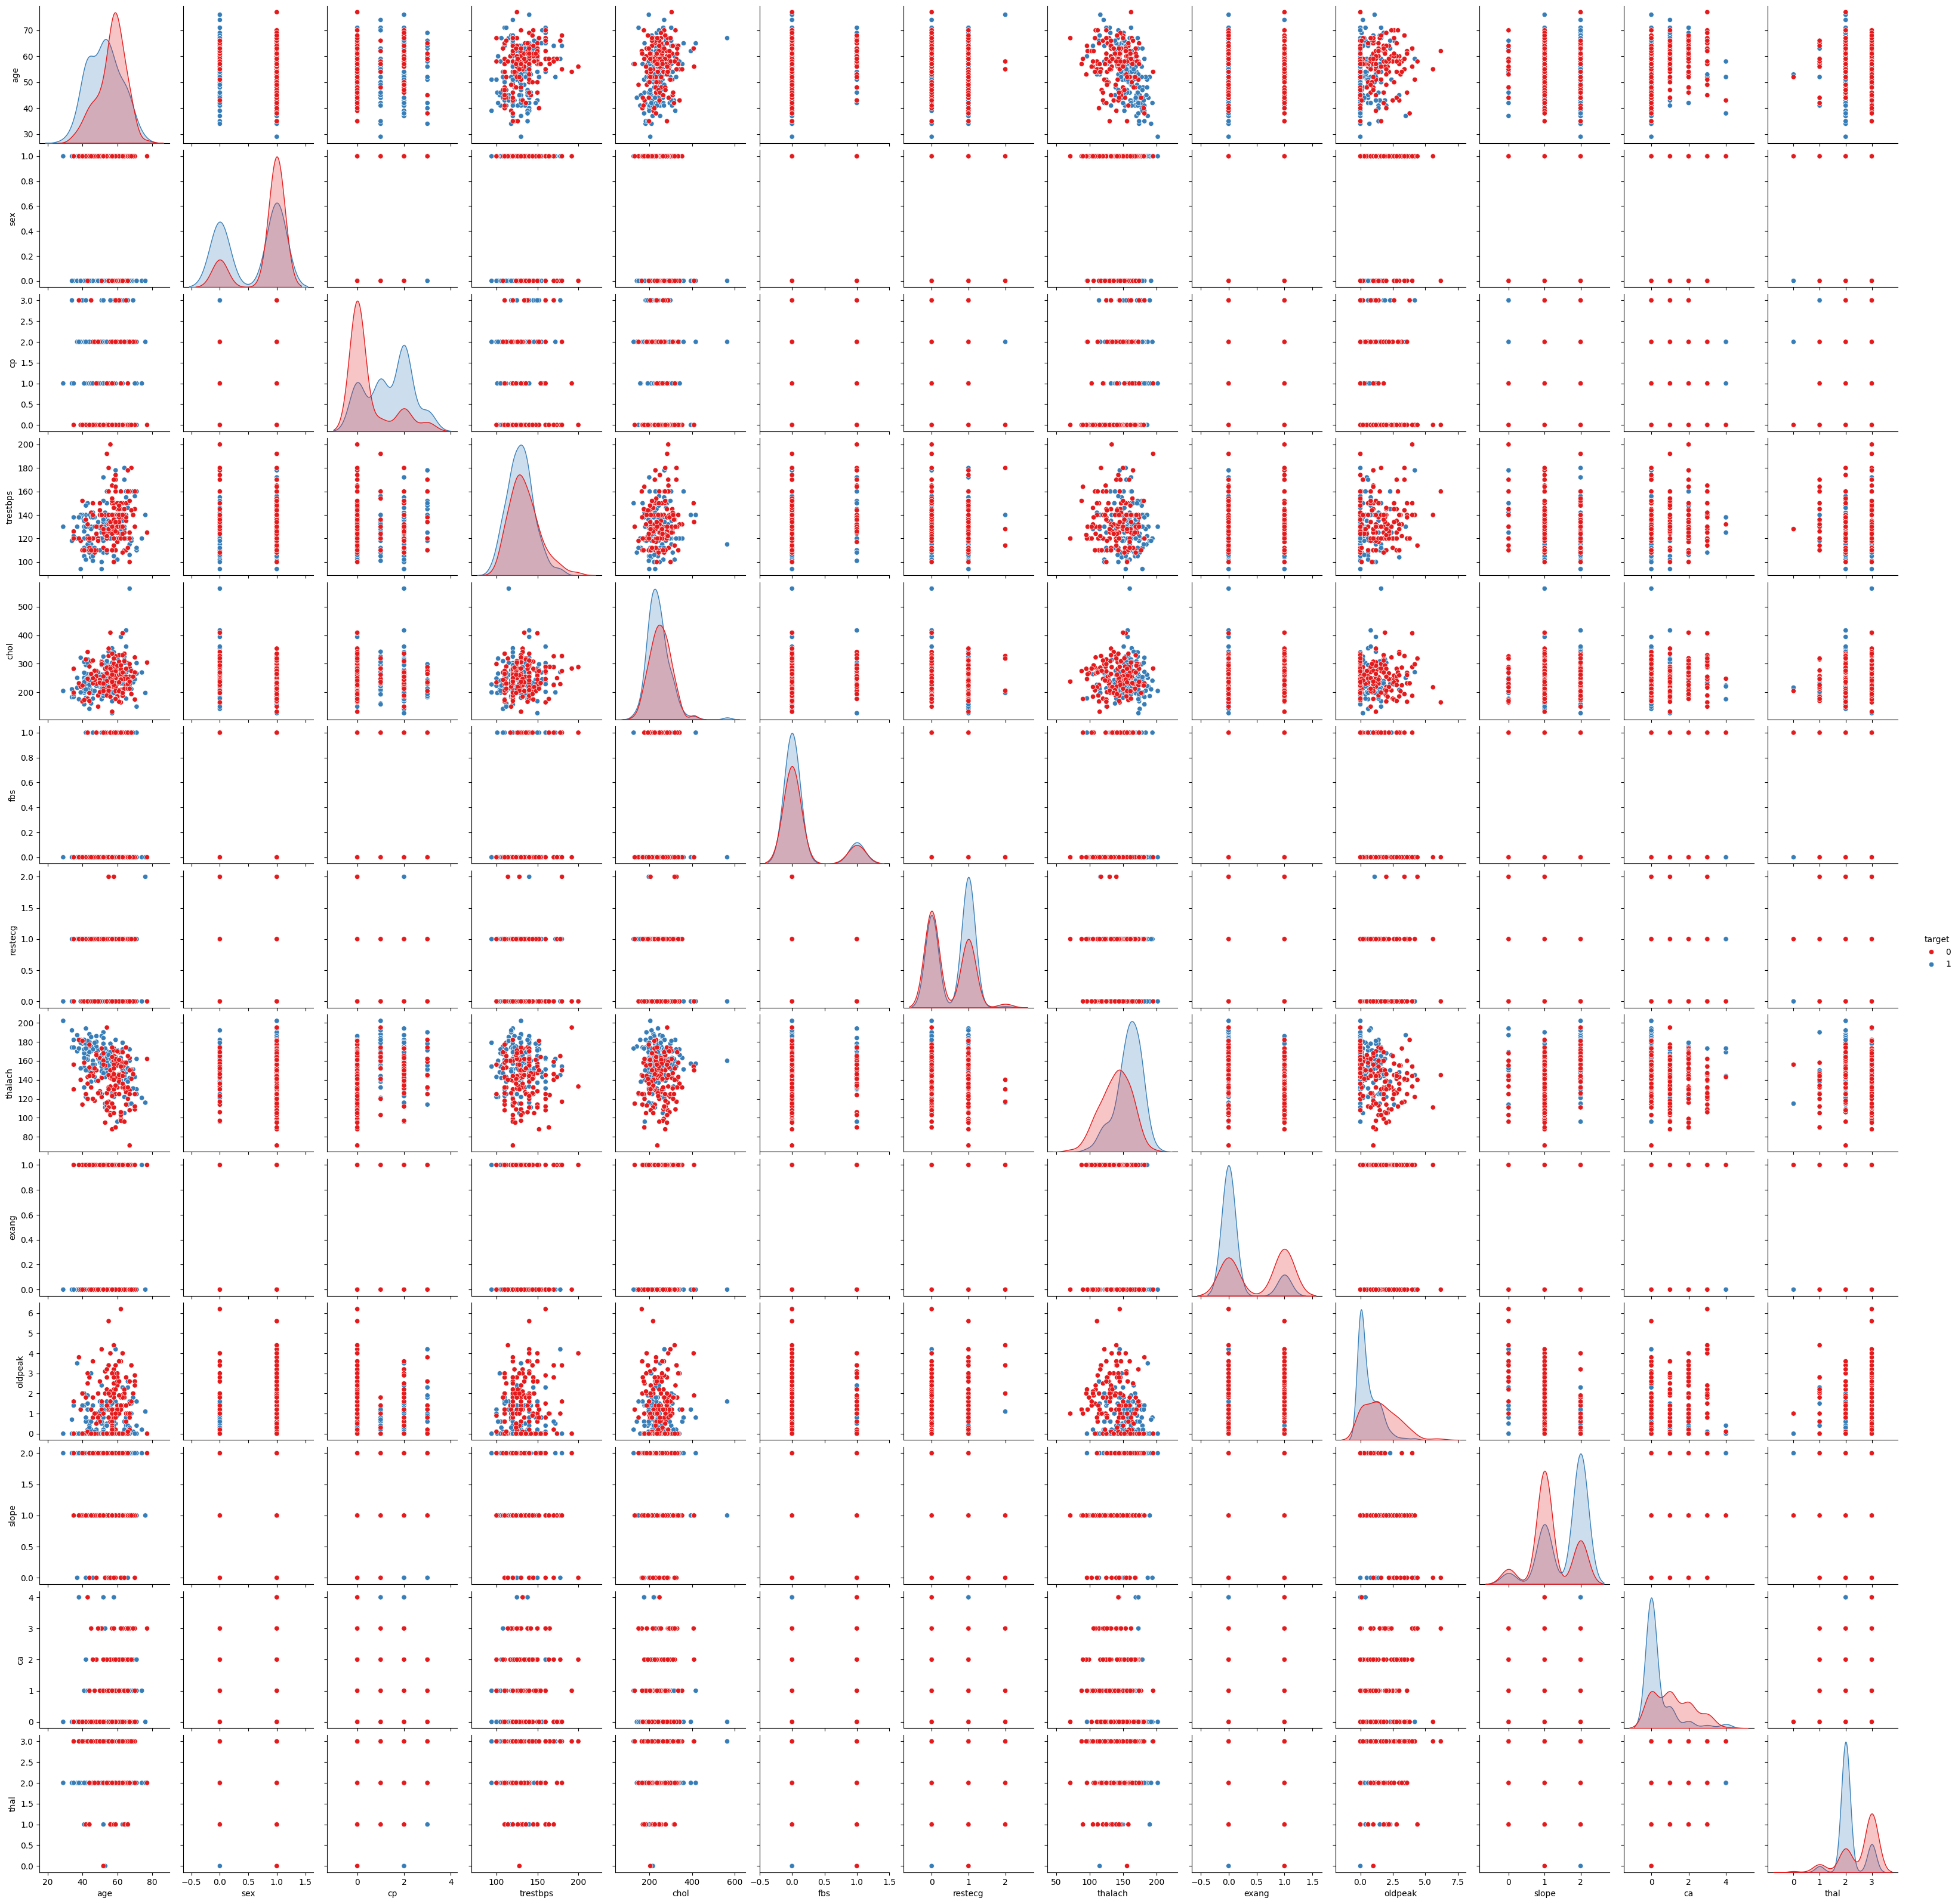

In [9]:
sns.pairplot(data = df , hue = 'target',palette='Set1')

# Extracting target and feature variables

In [10]:
X = df.drop('target',axis = 1)
y = df['target']

# Splitting data for training and testing

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Model


In [15]:
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [16]:
y_pred = clf.predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)

0.8421052631578947

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.81      0.90      0.85        39

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [19]:
confusion_matrix(y_test,y_pred)

array([[29,  8],
       [ 4, 35]])

# Grid Search to find best parameters

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [46]:
param = {
    'n_estimators' :[1,20,30,50,60,124],
    'learning_rate' : [0.001,0.01,1],

}

In [53]:
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [54]:
grid = GridSearchCV(estimator=clf,param_grid=param,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'learning_rate': [0.001, 0.01, 1],
                         'n_estimators': [1, 20, 30, 50, 60, 124]},
             scoring='accuracy')

In [55]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 60}

In [56]:
scores = grid.cv_results_

In [57]:
scores_df = pd.DataFrame(data=scores)

# Best Parameters

In [58]:
scores_df[['params','mean_test_score']].sort_values(by = 'mean_test_score',ascending = False)

,params,mean_test_score
16,"{'learning_rate': 1, 'n_estimators': 60}",0.824155
15,"{'learning_rate': 1, 'n_estimators': 50}",0.824058
14,"{'learning_rate': 1, 'n_estimators': 30}",0.819710
11,"{'learning_rate': 0.01, 'n_estimators': 124}",0.819517
13,"{'learning_rate': 1, 'n_estimators': 20}",0.815266
17,"{'learning_rate': 1, 'n_estimators': 124}",0.815169
1,"{'learning_rate': 0.001, 'n_estimators': 20}",0.766860
0,"{'learning_rate': 0.001, 'n_estimators': 1}",0.766860
2,"{'learning_rate': 0.001, 'n_estimators': 30}",0.766860
3,"{'learning_rate': 0.001, 'n_estimators': 50}",0.766860
